In [1]:
import numpy as np
import matplotlib.pyplot as plt
from localization import datasets, models, samplers
import jax
import jax.numpy as jnp
from jax.scipy.special import erf as gain_function

In [5]:
config_ = dict(
  # data config
  num_dimensions=400,
  xi1=20,
  xi2=10,
  num_exemplars=1000,
  support=(-1, 1), # defunct
  class_proportion=0.5,
)

In [6]:
high_gain = datasets.NonlinearGPDataset(key=jax.random.PRNGKey(0), gain=3, **config_)
low_gain = datasets.NonlinearGPDataset(key=jax.random.PRNGKey(0), gain=0.01, **config_)

y_high = np.where(high_gain[:100][1])[0][0], np.where(1 - high_gain[:100][1])[0][0]
y_low = np.where(low_gain[:100][1])[0][0], np.where(1 - low_gain[:100][1])[0][0]

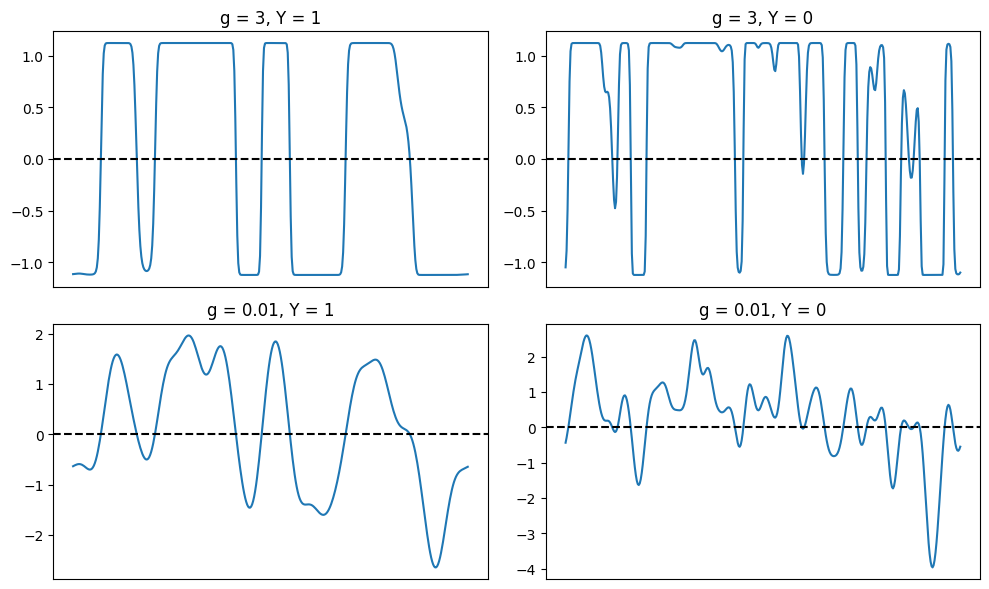

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(10, 6))
for i, ax in enumerate(axs.flatten()):
  if i // 2 == 0:
    ax.plot(high_gain[:100][0][y_high[i % 2]])
    ax.set_title(f"g = 3, Y = {y_high[i % 2]}")
  else:
    ax.plot(low_gain[:100][0][y_low[i % 2]])
    ax.set_title(f"g = 0.01, Y = {y_low[i % 2]}")
  ax.axhline(0, color='k', linestyle='--')
  ax.set_xticks([])
# fig.suptitle("Example data from the nonlinear GP dataset")
fig.tight_layout()